# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
print(student_data) 

   Edad  Retrasos
0    17        10
1    51         1
2    27         5
3    21         9
4    36         4
5    48         2
6    19         9
7    26         6
8    54         0
9    30         3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

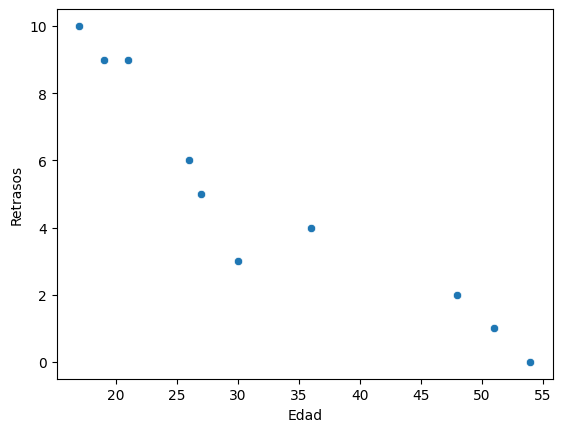

In [3]:
fig = sns.scatterplot(student_data, x = 'Edad', y = 'Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

In [4]:
# hay una correlación negativa. Si aumenta la variable 'Edad', disminuye la variable 'Retrasos'

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [5]:
covariance = student_data.cov()
print(covariance)

                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444


In [6]:
import math
math.sqrt(187)

13.674794331177344

In [7]:
corr = student_data.corr()
print(corr)

              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [8]:
x = student_data[['Edad']]
y = student_data[['Retrasos']]

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(x, y)

# Print coefs
print(lm.intercept_, lm.coef_)


# Se utiliza regresión lineal

[12.88880336] [[-0.24282077]]


Grafica tu modelo de regresión en tu diagrama de dispersión.

In [9]:
x_s = student_data['Edad']
y_s = student_data['Retrasos']

student_data['Predicciones'] = lm.predict(x)

fig = px.scatter (student_data, x = 'Edad', y = 'Retrasos', title = 'Modelo con regresión lineal')
fig.add_traces(px.line(student_data, x = 'Edad', y = 'Predicciones').data)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Edad=%{x}<br>Retrasos=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30], dtype=int64),
              'xaxis': 'x',
              'y': array([10,  1,  5,  9,  4,  2,  9,  6,  0,  3], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'Edad=%{x}<br>Predicciones=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30], dtype=int64),
              'xaxis': 'x',
              'y': array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
                           1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Modelo con regresión lineal'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Edad'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Retrasos'}}}
})

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

#se puede considerar la edad un buen predictor de los retrasos. 

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [11]:
numerical_vehicles = vehicles.select_dtypes(include=np.number)
numerical_vehicles.corr()

#la variable más relacionada con CO2 Emission Grams/Mile es Fuel Barrels/Year. Y la que menos correlación tiene es Year.


Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                 1.000000 -0.877752    -0.909664   
City MPG                         -0.877752  1.000000     0.923856   
Highway MPG                      -0.909664  0.923856     1.000000   
Combined MPG                     -0.909743  0.985457     0.969392   
CO2 Emission Grams/Mile           0.986189 -0.894139    -0.926405   
Fuel Cost/Year                    0.916208 -0.858645    -0.851404   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.204751                -0.222300       -0.091913  
Engine Displacement         -0.746782                 0.803520        0.769678  
Cylinders                   -0.698648                 0.752393        0.778153  
Fuel Barrels/Year           -0.909743                 0.986189        0.916208  
City MPG                     0.985457                -0.894139       -0.858645  
Highway MPG                  0.969392                -0.926405       -0.851404  
Combined MPG                 1.000000                -0.926229       -0.875185  
CO2 Emission Grams/Mile     -0.926229                 1.000000        0.930865  
Fuel Cost/Year              -0.875185                 0.930865        1.000000

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [12]:
y = vehicles[['CO2 Emission Grams/Mile']]
x = vehicles[['Fuel Barrels/Year']]

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(x, y)

# Print coefs
print(lm.intercept_, lm.coef_)

[12.48652083] [[26.2836254]]


In [13]:
y_s = vehicles['CO2 Emission Grams/Mile']
x_s = vehicles['Fuel Barrels/Year']

vehicles['Predicciones'] = lm.predict(x)

fig = px.scatter (vehicles, y = 'CO2 Emission Grams/Mile', x = 'Fuel Barrels/Year', title = 'Modelo con regresión lineal')
fig.add_traces(px.line(vehicles, y = 'CO2 Emission Grams/Mile', x = 'Predicciones').data)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Fuel Barrels/Year=%{x}<br>CO2 Emission Grams/Mile=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([19.38882353, 25.35461538, 20.600625  , ...,  9.15583333,  9.15583333,
                           9.41742857]),
              'xaxis': 'x',
              'y': array([522.76470588, 683.61538462, 555.4375    , ..., 244.        ,
                          246.        , 255.        ]),
              'yaxis': 'y'},
             {'hovertemplate': 'Predicciones=%{x}<br>CO2 Emission Grams/Mile=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([522.09509538, 678.8977337 , 553.94563128, ..., 253.13501437,
                          253.13501437, 260.01068561]),
              'xaxis': 'x',
              'y': array([522.76470588, 683.61538462, 555.4375    , ..., 244.        ,
                          246.        , 255.        ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Modelo con regresión lineal'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Fuel Barrels/Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'CO2 Emission Grams/Mile'}}}
})

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [14]:
asistentes_fiesta = pd.DataFrame({'Invitados': [1,3,4,6,8,9,11,14], 'Asistentes': [1,2,4,4,5,7,8,13]})
print(asistentes_fiesta)

   Invitados  Asistentes
0          1           1
1          3           2
2          4           4
3          6           4
4          8           5
5          9           7
6         11           8
7         14          13


In [15]:
asistentes_fiesta.corr()

Invitados  Asistentes
Invitados     1.00000     0.96523
Asistentes    0.96523     1.00000

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

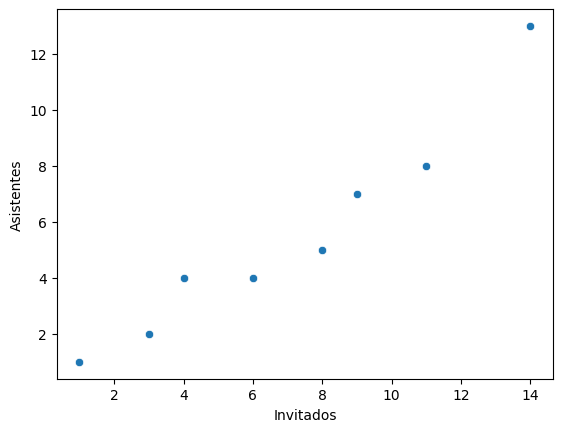

In [16]:
fig = sns.scatterplot(asistentes_fiesta, x = 'Invitados', y = 'Asistentes')

In [17]:
x = asistentes_fiesta[['Invitados']]
y = asistentes_fiesta[['Asistentes']]

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(x, y)

# Print coefs
print(lm.intercept_, lm.coef_)

[-0.43939394] [[0.84848485]]


In [18]:
x_s = asistentes_fiesta['Invitados']
y_s = asistentes_fiesta['Asistentes']

asistentes_fiesta['Predicciones'] = lm.predict(x)

fig = px.scatter (asistentes_fiesta, x = 'Invitados', y = 'Asistentes', title = 'Modelo con regresión lineal')
fig.add_traces(px.line(asistentes_fiesta, x = 'Invitados', y = 'Predicciones').data)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Invitados=%{x}<br>Asistentes=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1,  3,  4,  6,  8,  9, 11, 14], dtype=int64),
              'xaxis': 'x',
              'y': array([ 1,  2,  4,  4,  5,  7,  8, 13], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'Invitados=%{x}<br>Predicciones=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1,  3,  4,  6,  8,  9, 11, 14], dtype=int64),
              'xaxis': 'x',
              'y': array([ 0.40909091,  2.10606061,  2.95454545,  4.65151515,  6.34848485,
                           7.1969697 ,  8.89393939, 11.43939394]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Modelo con regresión lineal'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Invitados'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Asistentes'}}}
})

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

#el gráfico muestra que las variables están correlacionadas positivamente


¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [ ]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*